In [12]:
#Question 1
#Find whether a correlation exists between the number of dependents and the number of married couples
#Married couples can be represented by the "number of joint returns" as joint returns are filed specifically
#by married couples that would like to reap the benefits of filing their tax data together. Additionally, determine 
#whether or not a correlation exists between the number of dependents and number of returns.

In [13]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [14]:
#Loading the data from the dataset
df = pd.read_csv("MAZip.csv")
df.head(10)

df = df.iloc[:3849,[0,1,2,3,4,8]]

df = df.dropna() #dropped null vals

df = df[df["Number of returns"] != "**"]
df = df[df["Number of joint returns"] != "**"]
df = df[df["Number of single returns"] != "**"]
df = df[df["Number of dependents"] != "**"]
#df = df.drop([2,3,4,5,6,7,8])

In [15]:
df

,ZIP code,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of dependents
3,1001,"$1 under $25,000",2910,2280,310,610
4,1001,"$25,000 under $50,000",2190,1330,510,940
5,1001,"$50,000 under $75,000",1520,730,600,750
6,1001,"$75,000 under $100,000",910,230,600,630
7,1001,"$100,000 under $200,000",1120,160,910,950
8,1001,"$200,000 or more",130,20,100,120
11,1002,"$1 under $25,000",3550,2980,230,710
12,1002,"$25,000 under $50,000",1700,1070,360,710
13,1002,"$50,000 under $75,000",1160,560,450,560
14,1002,"$75,000 under $100,000",840,230,540,560


In [21]:
#Cleaning the data to get the relevant information
total_returns = []
total_dependents = []
result = []
for i in df.index: 
    returns = df['Number of returns']
    dependents = df['Number of dependents']
for k, j in zip(dependents, returns):
    if k != "**" and j != "**":
        total_returns.append(int(j))
        total_dependents.append(int(k))
        result.append((float(k)/(float(j) + 0.0001)))
print "first ten results: ",result[0:10]
print
print "total lines = number of dependents/number of returns: ",len(result)

first ten results:  [0.2096219859236431, 0.4292237246929806, 0.4934210201696697, 0.6923076162299323, 0.8482142099808742, 0.9230762130182977, 0.19999999436619734, 0.4176470342560568, 0.4827585790725363, 0.6666665873015968]

total lines = number of dependents/number of returns:  2465


After omitting rows that contain null values, the first step in our analysis was to divided the number of dependents by the number of returns. To avoid a float division by zero, we've added a small number (i.e. 0.0001) to the denominator. These results are stored in a list, whose length is 2465.

In [23]:
joint_returns = []
single_returns = []
for i in df.index: 
    jr = df['Number of joint returns']
    sr = df['Number of single returns']
for j in jr:
    if j != "**":
        joint_returns.append(float(j))
    #print result[0:10]
for k in sr:
    if k != "**":
        single_returns.append(float(k))
    #print result[0:10]

print "first ten results: ",joint_returns[0:10]
print "total lines = joint returns: ",len(joint_returns)
print
print "first ten results: ",joint_returns[0:10]
print "total lines = single returns: ",len(single_returns)

first ten results:  [310.0, 510.0, 600.0, 600.0, 910.0, 100.0, 230.0, 360.0, 450.0, 540.0]
total lines = joint returns:  2465

first ten results:  [310.0, 510.0, 600.0, 600.0, 910.0, 100.0, 230.0, 360.0, 450.0, 540.0]
total lines = single returns:  2465


Once again, the null rows were omitted in terms of aggregating the joint returns and single returns in separate lists. Each value pertains to a certain zip code. The length of both lists, as expected, is 2465.

(0, 5000)

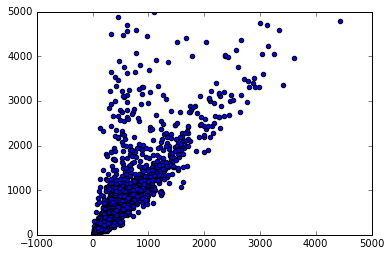

In [26]:
#Take a look at joint returns vs dependents
plt.scatter(joint_returns,total_dependents)
plt.ylim([0,5000])

In [71]:
r = sm.OLS(total_dependents,sm.add_constant(joint_returns)).fit()
print (r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     3753.
Date:                Sun, 24 Apr 2016   Prob (F-statistic):               0.00
Time:                        19:54:32   Log-Likelihood:                -18997.
No. Observations:                2459   AIC:                         3.800e+04
Df Residuals:                    2457   BIC:                         3.801e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         77.8914     14.908      5.225      0.0

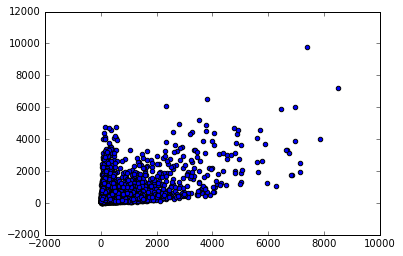

In [72]:
#Take a look at single returns vs dependents
plt.scatter(single_returns,total_dependents)

In [73]:
r2 = sm.OLS(total_dependents,sm.add_constant(single_returns)).fit()
print (r2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     770.3
Date:                Sun, 24 Apr 2016   Prob (F-statistic):          1.03e-147
Time:                        19:54:59   Log-Likelihood:                -19802.
No. Observations:                2459   AIC:                         3.961e+04
Df Residuals:                    2457   BIC:                         3.962e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        413.7730     18.295     22.617      0.0

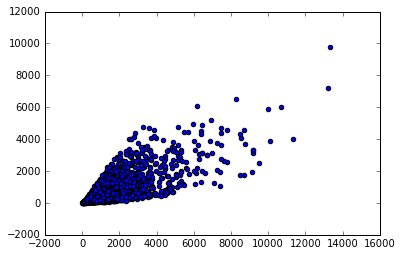

In [74]:
#Take a look at total returns vs dependents
plt.scatter(total_returns,total_dependents)

In [76]:
r2 = sm.OLS(total_dependents,sm.add_constant(total_returns)).fit()
print (r2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     3665.
Date:                Sun, 24 Apr 2016   Prob (F-statistic):               0.00
Time:                        19:56:32   Log-Likelihood:                -19014.
No. Observations:                2459   AIC:                         3.803e+04
Df Residuals:                    2457   BIC:                         3.804e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         98.1657     14.825      6.622      0.0

We utilized the statsmodel library to return regression results taking into consideration three dependencies. These include:

* total number of dependents vs. joint returns (Task 1)
* total number of dependents vs. single returns (Task 2)
* total number of dependents vs. total number of returns (Task 3)

It's interesting to note that the R-sqaured value for Task 1 and Task 3 do not vary much. The value for Task 1 is 0.599 and the value for Task 3 is 0.604. A higher correlation exists among these tasks compared to Task 2, which revealed an R-sqaured value of 0.239. 